<a href="https://colab.research.google.com/github/TR-ABDULLAHALA/GlobalAiHub_Akbank_Bootcamp_HousingPricePredicition/blob/main/HousingPricePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
#Kütüphaneleri içe aktarma.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [164]:
# Google Drive'ı dizinine bağlama
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
#CSV(verisetini) dosyasını okuma ve verileri 'data' adlı bir Pandas DataFrame'e yükleme
data = pd.read_csv("/content/drive/MyDrive/Projects/Housing Price Predictions/DATASET/Melbourne_housing_FULL.csv")

In [166]:
print("Veri Setinin ilk 5 sütunu Genel Bakış:",end='\n\n')
print(data.head(5))# DataFrame'in ilk 5 satırını yazdırarak verinin önizlemesini gerçekleştirme

Veri Setinin ilk 5 sütunu Genel Bakış:

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         Council

In [167]:
print("Veri Bilgileri:",end='\n\n')
print(data.info()) # DataFrame hakkında genel bilgileri görüntüleme

Veri Bilgileri:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  fl

In [168]:
print("Shape:", data.shape) # DataFrame'in şeklini (satır, sütun) yazdırır.
print("Number of Columns:", len(data.columns)) # DataFrame'in sütun sayısını yazdırır.
print("Size:", data.size) # DataFrame'in boyutunu (toplam hücre sayısı) yazdırır


Shape: (34857, 21)
Number of Columns: 21
Size: 731997


In [169]:
# DataFrame'in temel istatistiksel bilgilerini yazdırır
print(data.describe())


              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

In [170]:
data = data.fillna(data.mode().iloc[0]) #Eksik değerleri mod ile doldurma


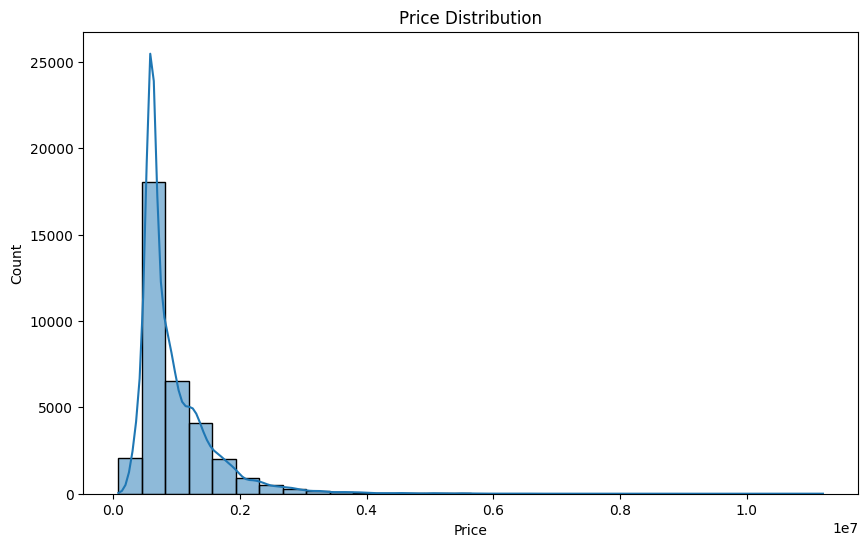

In [171]:
plt.figure(figsize=(10, 6))# Figure boyutlandırma
sns.histplot(data['Price'], bins=30, kde=True)# Seaborn kütüphanesi ile 'Price' sütununun histogramını oluşturma
plt.title('Price Distribution')# Histogram başlığı oluşturma
plt.show()# Grafiği gösterme

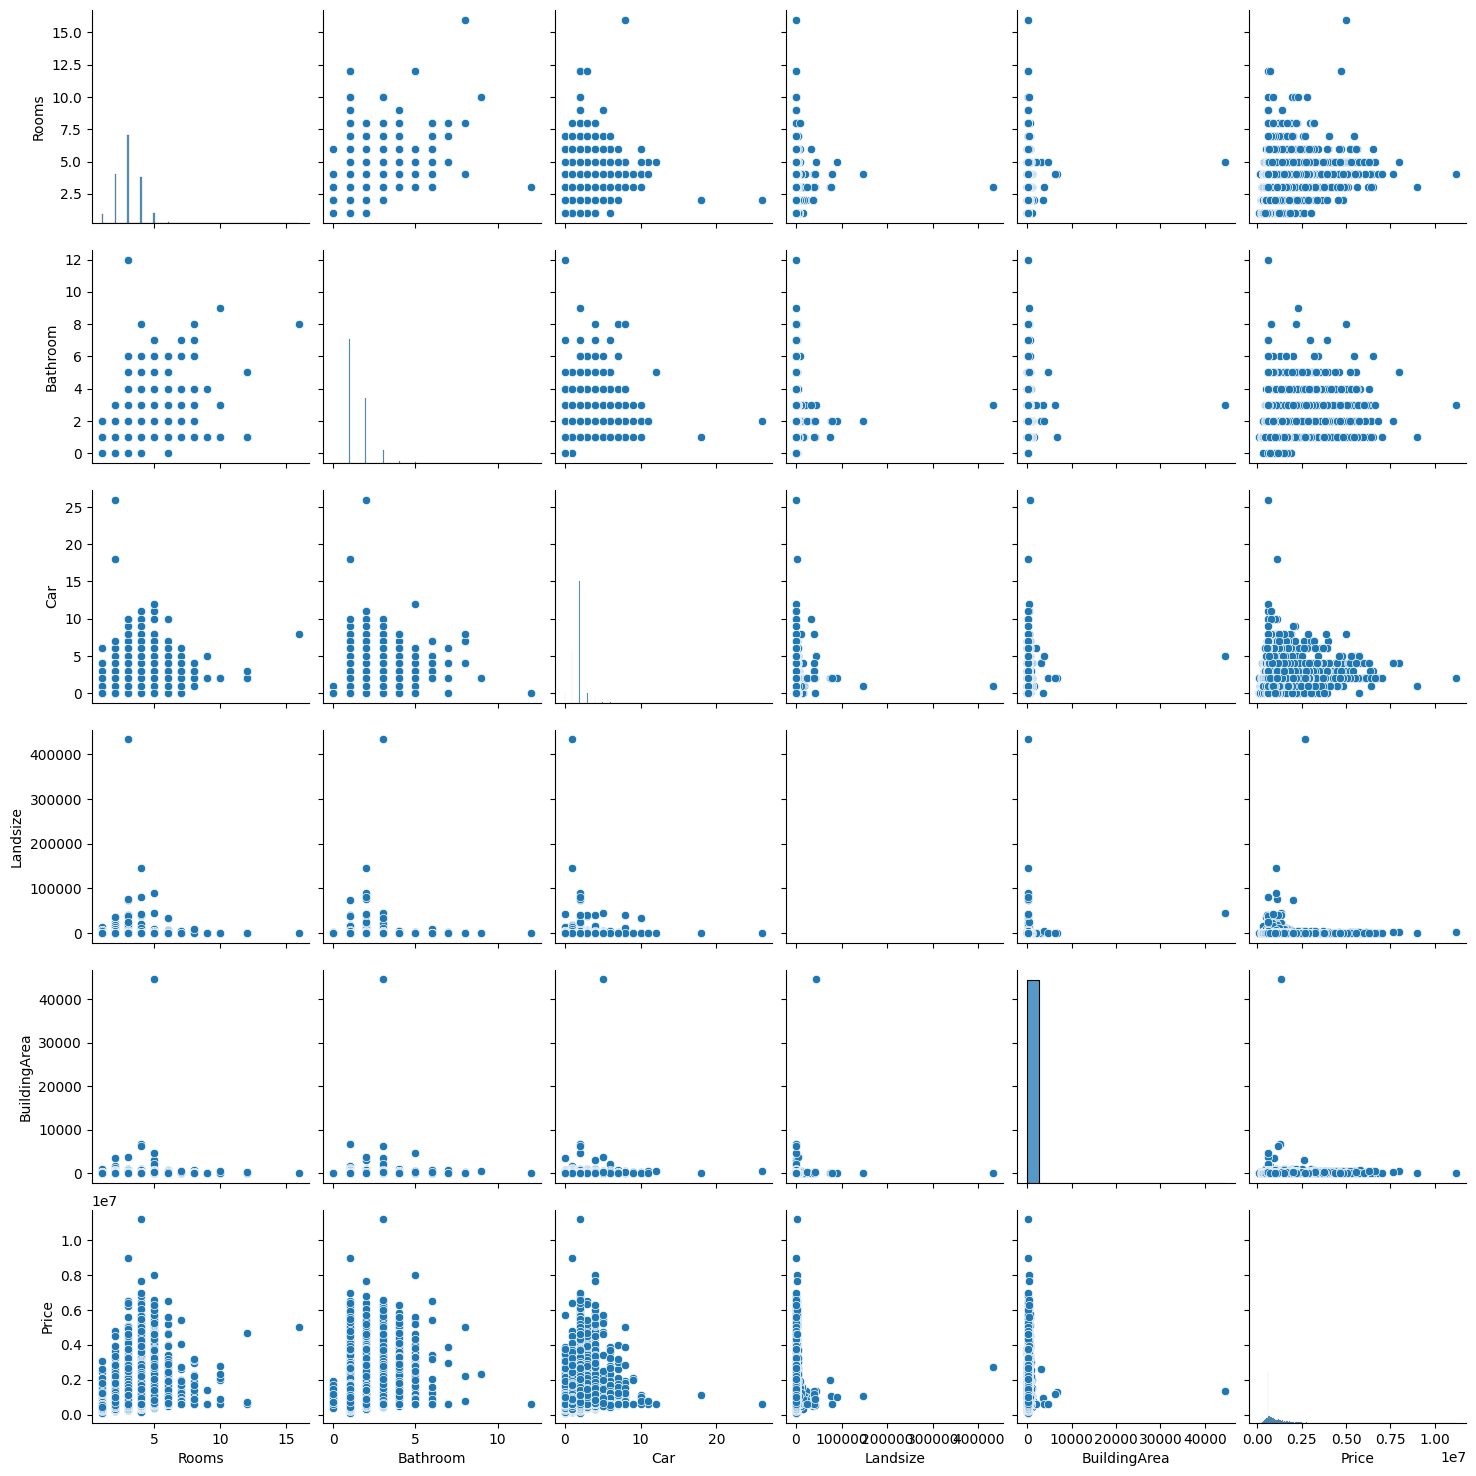

In [172]:
# Seaborn kütüphanesi ile belirli özellikler arasındaki çift özellikli grafiği oluşturma
sns.pairplot(data[['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']])
plt.show()# Grafiği gösterme

<ipython-input-173-ee7970438df2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()# Korelasyon matrisini oluşturma


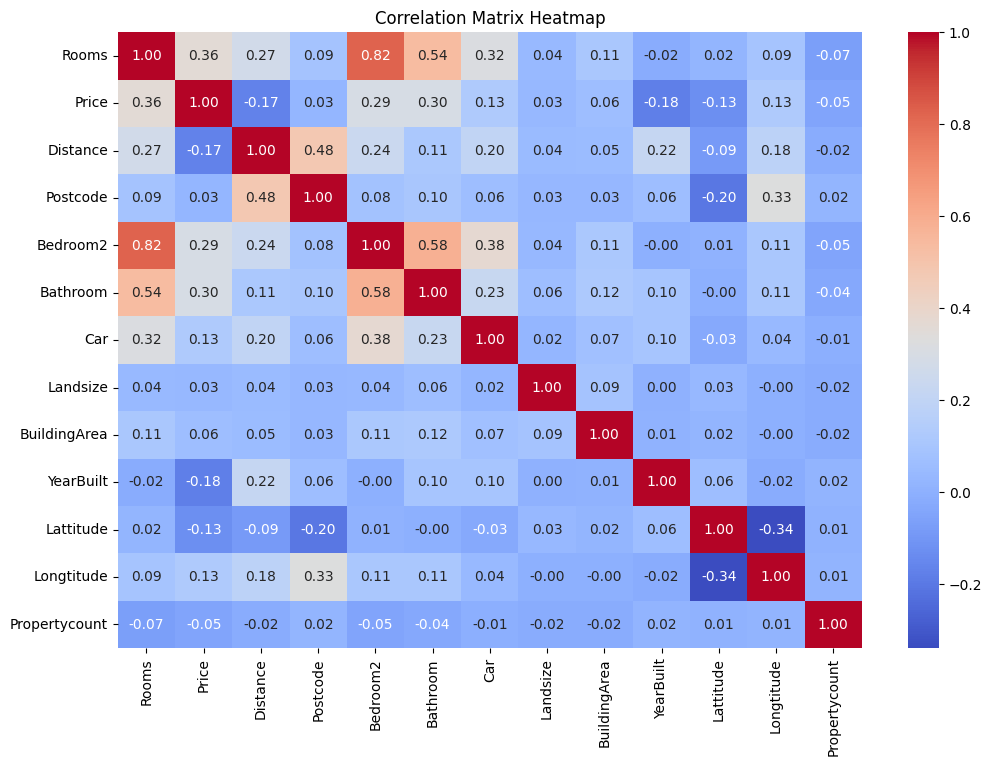

In [173]:
correlation_matrix = data.corr()# Korelasyon matrisini oluşturma
plt.figure(figsize=(12, 8))# Figure boyutlandırma
# Seaborn kütüphanesi ile korelasyon matrisinin ısı haritasını oluşturma
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')# Grafiğe başlık ekleme
plt.show()# Grafiği gösterme

In [174]:
# 'Rooms' ve 'Bedroom2' sütunlarındaki değerleri toplayarak 'TotalRooms' sütununu oluşturma
data['TotalRooms'] = data['Rooms'] + data['Bedroom2']

In [175]:
# LabelEncoder'ı kullanarak kategorik (object) verileri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [176]:
# Kategorik sütunlardaki verileri one-hot encoding ile dönüştürme
data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns, drop_first=True)


In [177]:
# Sayısal sütunlardaki değerleri 0 ile 1 arasında normalleştirme
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = (data[numerical_cols] - data[numerical_cols].min()) / (data[numerical_cols].max() - data[numerical_cols].min())


In [178]:
X = data.drop('Price', axis=1)# Bağımlı değişkeni ('Price') çıkararak bağımsız değişken (X) oluşturma
y = data['Price']# Bağımlı değişkeni ('Price') belirleme
# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Regresyon modellerini içeren model sözlüğü oluşturma

models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
}

In [180]:
#Modelleri eğitme
for name, model in models.items():
  model.fit(X_train, y_train)

In [181]:
print("\nModel Evaluation:")
best_model = None
best_mae = float('inf')  # MAE ve RMSE gibi minimizasyon metrikleri için büyük bir değerle başlatılır.
best_mse = float('inf')
best_rmse = float('inf')
best_r2 = float('-inf')  # R2 gibi maksimizasyon metrikleri için küçük bir değerle başlatılır.

for name, model in models.items():
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  R-squared (R2): {r2}")
    print("----------------------------------------")

    # Birden çok metriğe göre modelleri karşılaştırma
    if mae < best_mae and mse < best_mse and rmse < best_rmse and r2 > best_r2:
        best_model = model
        best_mae = mae
        best_mse = mse
        best_rmse = rmse
        best_r2 = r2

# En iyi performans gösteren modeli yazdırma
print("\nBest-Performing Model:")
print(f"  Model Type: {type(best_model).__name__}")
print(f"  Mean Absolute Error (MAE): {best_mae}")
print(f"  Mean Squared Error (MSE): {best_mse}")
print(f"  Root Mean Squared Error (RMSE): {best_rmse}")
print(f"  R-squared (R2): {best_r2}")


Model Evaluation:
Lasso:
  Mean Absolute Error (MAE): 0.03662197357122119
  Mean Squared Error (MSE): 0.00265676898158073
  Root Mean Squared Error (RMSE): 0.051543854935197954
  R-squared (R2): -0.0015417973391143036
----------------------------------------
LinearRegression:
  Mean Absolute Error (MAE): 0.028676543916465277
  Mean Squared Error (MSE): 0.002027896990032818
  Root Mean Squared Error (RMSE): 0.045032177273953984
  R-squared (R2): 0.235528715406928
----------------------------------------
Ridge:
  Mean Absolute Error (MAE): 0.028592980287081914
  Mean Squared Error (MSE): 0.0018896296371319272
  Root Mean Squared Error (RMSE): 0.04346987045221008
  R-squared (R2): 0.28765237918716613
----------------------------------------
ElasticNet:
  Mean Absolute Error (MAE): 0.03662197357122119
  Mean Squared Error (MSE): 0.00265676898158073
  Root Mean Squared Error (RMSE): 0.051543854935197954
  R-squared (R2): -0.0015417973391143036
----------------------------------------
KNeig